In [1]:
import numpy as np
import random

In [2]:
# Step 2: GA Functions
def create_individual(length):
    # Random binary individual
    return np.random.randint(2, size=length)

def fitness(individual):
    # Objective: maximize number of 1s
    return sum(individual)

def mutate(individual, mutation_rate=0.01):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i]
    return individual

def crossover(parent1, parent2):
    point = random.randint(1, len(parent1)-1)
    child1 = np.concatenate([parent1[:point], parent2[point:]])
    child2 = np.concatenate([parent2[:point], parent1[point:]])
    return child1, child2

In [3]:
def genetic_algorithm(population_size=10, chromosome_length=8, generations=20, mutation_rate=0.01):
    print("hellow")
    population = [create_individual(chromosome_length) for _ in range(population_size)]

    for g in range(generations):
        scored = sorted(
            [(fitness(ind), ind) for ind in population],
            key=lambda pair: pair[0],
            reverse=True
        )
        print(f"Gen {g} | Best: {scored[0][0]} | Avg: {np.mean([f for f,_ in scored])}")

        next_gen = [scored[0][1], scored[1][1]]  # Elite selection

        while len(next_gen) < population_size:
            parents = random.sample(scored[:5], 2)
            c1, c2 = crossover(parents[0][1], parents[1][1])
            next_gen.append(mutate(c1.copy(), mutation_rate))
            if len(next_gen) < population_size:
                next_gen.append(mutate(c2.copy(), mutation_rate))

        population = next_gen

    print("Best individual:", scored[0][1], "with fitness:", scored[0][0])
genetic_algorithm()

hellow
Gen 0 | Best: 7 | Avg: 3.9
Gen 1 | Best: 7 | Avg: 5.5
Gen 2 | Best: 8 | Avg: 6.8
Gen 3 | Best: 8 | Avg: 7.1
Gen 4 | Best: 8 | Avg: 7.5
Gen 5 | Best: 8 | Avg: 8.0
Gen 6 | Best: 8 | Avg: 8.0
Gen 7 | Best: 8 | Avg: 8.0
Gen 8 | Best: 8 | Avg: 7.8
Gen 9 | Best: 8 | Avg: 7.8
Gen 10 | Best: 8 | Avg: 7.9
Gen 11 | Best: 8 | Avg: 8.0
Gen 12 | Best: 8 | Avg: 7.9
Gen 13 | Best: 8 | Avg: 8.0
Gen 14 | Best: 8 | Avg: 7.9
Gen 15 | Best: 8 | Avg: 8.0
Gen 16 | Best: 8 | Avg: 8.0
Gen 17 | Best: 8 | Avg: 8.0
Gen 18 | Best: 8 | Avg: 7.9
Gen 19 | Best: 8 | Avg: 8.0
Best individual: [1 1 1 1 1 1 1 1] with fitness: 8


In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [5]:
def genetic_algorithm(population_size=10, chromosome_length=8, generations=20, mutation_rate=0.01):
    print("hellow")
    population = [create_individual(chromosome_length) for _ in range(population_size)]

    for g in range(generations):
        scored = sorted(
            [(fitness(ind), ind) for ind in population],
            key=lambda pair: pair[0],
            reverse=True
        )
        print(f"Gen {g} | Best: {scored[0][0]} | Avg: {np.mean([f for f,_ in scored])}")

        next_gen = [scored[0][1], scored[1][1]]  # Elite selection

        while len(next_gen) < population_size:
            parents = random.sample(scored[:5], 2)
            c1, c2 = crossover(parents[0][1], parents[1][1])
            next_gen.append(mutate(c1.copy(), mutation_rate))
            if len(next_gen) < population_size:
                next_gen.append(mutate(c2.copy(), mutation_rate))

        population = next_gen

    print("Best individual:", scored[0][1], "with fitness:", scored[0][0])
genetic_algorithm()

hellow
Gen 0 | Best: 7 | Avg: 4.2
Gen 1 | Best: 7 | Avg: 5.2
Gen 2 | Best: 7 | Avg: 5.8
Gen 3 | Best: 7 | Avg: 6.8
Gen 4 | Best: 7 | Avg: 7.0
Gen 5 | Best: 7 | Avg: 7.0
Gen 6 | Best: 7 | Avg: 7.0
Gen 7 | Best: 7 | Avg: 7.0
Gen 8 | Best: 7 | Avg: 6.9
Gen 9 | Best: 7 | Avg: 7.0
Gen 10 | Best: 7 | Avg: 6.9
Gen 11 | Best: 7 | Avg: 7.0
Gen 12 | Best: 7 | Avg: 7.0
Gen 13 | Best: 7 | Avg: 6.9
Gen 14 | Best: 7 | Avg: 6.8
Gen 15 | Best: 7 | Avg: 6.8
Gen 16 | Best: 7 | Avg: 6.9
Gen 17 | Best: 7 | Avg: 7.0
Gen 18 | Best: 7 | Avg: 6.9
Gen 19 | Best: 8 | Avg: 7.1
Best individual: [1 1 1 1 1 1 1 1] with fitness: 8


In [6]:
# Step 1: Imports
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [7]:
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [8]:
model = keras.Sequential([
    keras.layers.Dense(8, activation='relu', input_shape=(4,)),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(3, activation='softmax') # 3 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 273ms/step - accuracy: 0.2751 - loss: 1.2331 - val_accuracy: 0.2368 - val_loss: 1.2437
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.3469 - loss: 1.1860 - val_accuracy: 0.2632 - val_loss: 1.2161
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.3219 - loss: 1.1786 - val_accuracy: 0.2895 - val_loss: 1.1894
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.3244 - loss: 1.1617 - val_accuracy: 0.2895 - val_loss: 1.1632
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.3668 - loss: 1.1484 - val_accuracy: 0.2895 - val_loss: 1.1376
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.3443 - loss: 1.1135 - val_accuracy: 0.3421 - val_loss: 1.1132
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.4006 - loss: 1.0700 - val_accuracy: 0.3684 - val_loss: 1.0898
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3682 - loss: 1.0889 - val_accuracy: 0.3684 - val_loss: 1.0

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9090 - loss: 0.4275

Test accuracy: 0.8947368264198303


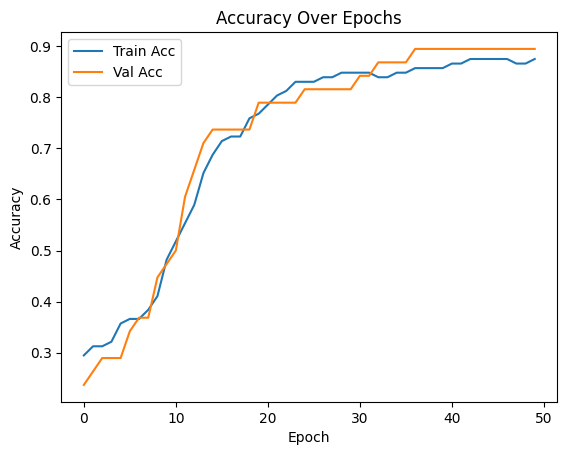

In [9]:
# Step 4: Evaluate and Visualize Results
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

In [10]:
from keras.models import Sequential
from keras.layers import Dense

# Define model with more layers and varied activation
model = Sequential([
    Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes for iris
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.0894 - loss: 1.1183 - val_accuracy: 0.0789 - val_loss: 1.1016
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1618 - loss: 1.0983 - val_accuracy: 0.1842 - val_loss: 1.0779
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1740 - loss: 1.0798 - val_accuracy: 0.2895 - val_loss: 1.0546
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2457 - loss: 1.0585 - val_accuracy: 0.4474 - val_loss: 1.0298
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3765 - loss: 1.0385 - val_accuracy: 0.4474 - val_loss: 1.0058
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4045 - loss: 1.0188 - val_accuracy: 0.4474 - val_loss: 0.9808
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4131 - loss: 1.0150 - val_accuracy: 0.4474 - val_loss: 0.9521
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4555 - loss: 0.9875 - val_accuracy: 0.5263 - val_loss: 0.9223

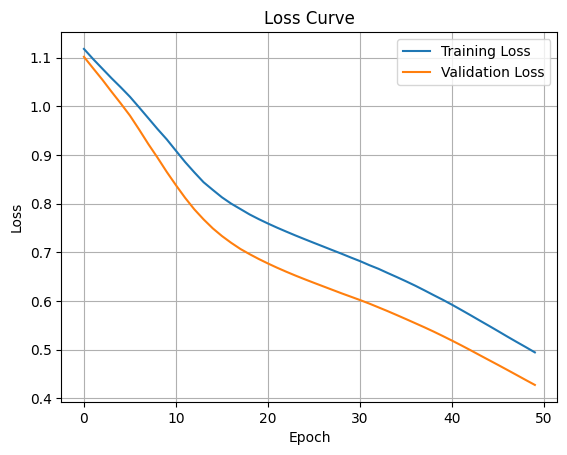

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# New iris sample (sepal length, sepal width, petal length, petal width)
example = scaler.transform([[5.1, 3.5, 1.4, 0.2]])
predicted_class = model.predict(example)
print("Predicted probabilities:", predicted_class)
print("Predicted class:", predicted_class.argmax())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Predicted probabilities: [[0.25584143 0.06460965 0.6795489 ]]
Predicted class: 2


In [14]:
from sklearn.datasets import load_iris
iris = load_iris()

print("Predicted Species:", iris.target_names[predicted_class.argmax()])


Predicted Species: virginica
